# 🌊 Wave Buoy Data from the U.S. National Data Buoy Center (NDBC)

Data is retrieved from the **National Data Buoy Center (NDBC)**:  
🔗 [https://www.ndbc.noaa.gov/](https://www.ndbc.noaa.gov/)

This notebook downloads and visualizes historical wave buoy data, including:

- **Bulk wave parameters**
- **Density energy spectra** (when available)
- **Directional wave spectra** (when available)

📘 **Reference documentation:**
- [NDBC Web Data Guide](https://www.ndbc.noaa.gov/docs/ndbc_web_data_guide.pdf)  
- [Measurement Descriptions & Units](https://www.ndbc.noaa.gov/faq/measdes.shtml)


---


<summary><strong>📥 Downloading Bulk Wave Parameters</strong></summary>

This section downloads time series data (e.g., significant wave height, period, direction) for a given buoy.

- NDBC data files are organized by year.
- File formats and available variables vary across years.
- This script handles inconsistencies and outputs a clean, standardized dataset.

---


<summary><strong>🌊 Downloading Density Energy Spectra</strong></summary>

This section retrieves **density energy spectra** data, stored in yearly files.

- Formats vary (e.g., frequency resolution, date formatting).
- The script processes each year independently but allows plotting across multiple years.
- Only buoys with a `"w"` suffix provide wave spectra. If data is unavailable, an HTTP 404 is raised and skipped.

📘 **More info:** [Wave Spectra Description](https://www.ndbc.noaa.gov/faq/wavespectra.shtml)



---


<summary><strong>🧭 Directional Wave Spectrum Reconstruction</strong></summary>

To reconstruct the directional wave spectrum, multiple coefficient files must be downloaded.

The directional spectrum is:

\[
\begin{align*}
S(f, A) = C_{11}(f) \cdot D(f, A)
\end{align*}
\]

Where:

- \( f \) = frequency (Hz)  
- \( A \) = azimuth angle (°), measured clockwise from true North (direction **waves come from**)  
- \( D(f, A) \) is defined as:

\[
\begin{align*}
D(f, A) = \frac{1}{\pi} \left[ 0.5 + R_1 \cos(A - \alpha_1) + R_2 \cos\left(2(A - \alpha_2)\right) \right]
\end{align*}
\]

### Fourier Coefficients

\[
\begin{align*}
R_1 &= \frac{\sqrt{a_1^2 + b_1^2}}{a_0} \\
R_2 &= \frac{\sqrt{a_2^2 + b_2^2}}{a_0} \\
\alpha_1 &= 270^\circ - \arctan2(b_1, a_1) \\
\alpha_2 &= 270^\circ - 0.5 \cdot \arctan2(b_2, a_2) \pm 180^\circ
\end{align*}
\]

### Notes

- Historical monthly/yearly `R1` and `R2` values are scaled by 100 → multiply by **0.01**
- \( D(f, A) \) may contain **negative values** due to cosine terms.
  - See: *Earle et al., Ocean Engineering (1999)* for methods to handle this
- \( \alpha_2 \) may be adjusted by 180° to minimize its difference with \( \alpha_1 \)

📘 **Further Reading:**  
Earle, Steele & Wang (1999). *Use of advanced directional wave spectra analysis methods*. Ocean Engineering, 26(12), 1421–1434.




In [1]:
from bluemath_tk.downloaders.noaa.noaa_downloader import NOAADownloader


noaa_downloader = NOAADownloader(base_path_to_download="NOAA_data")
noaa_downloader

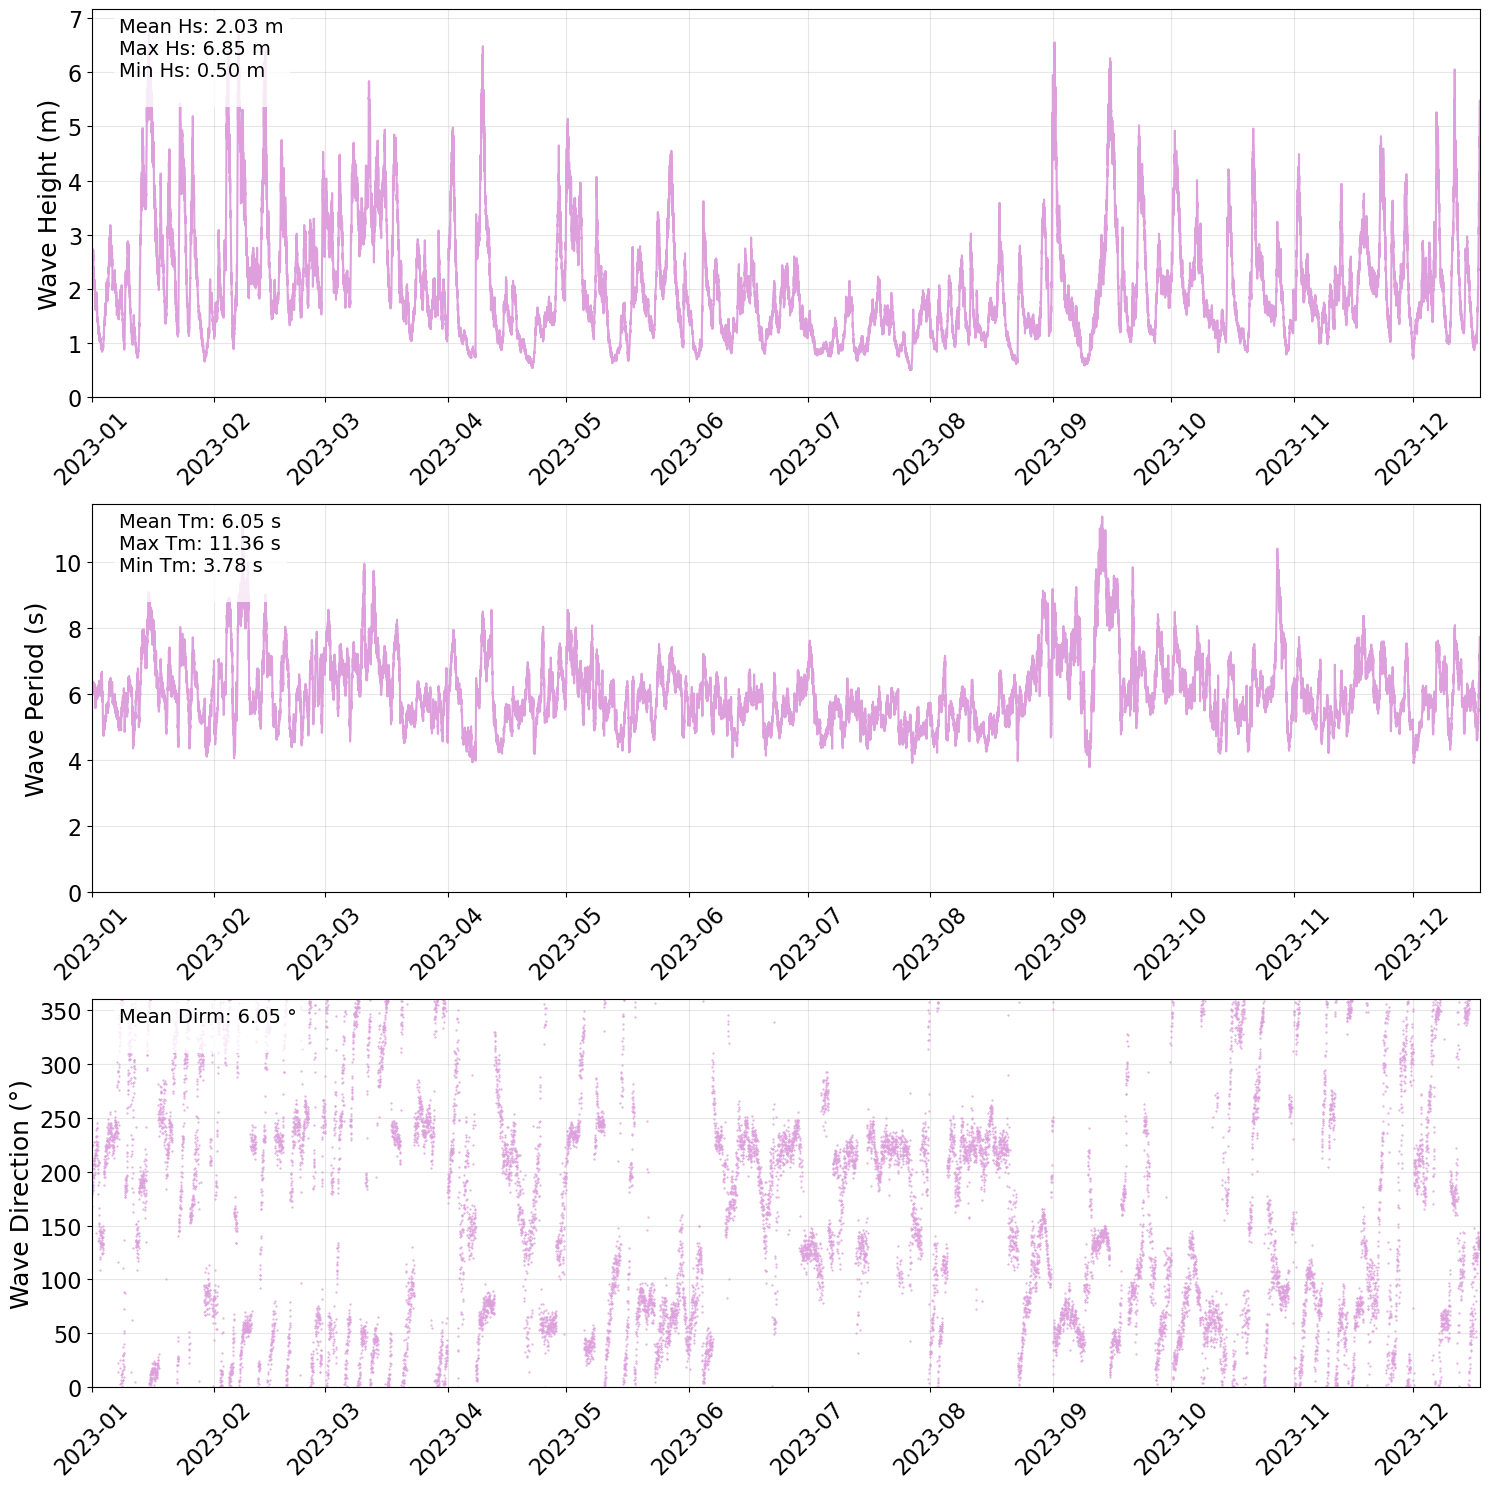

In [ ]:
# Downloading and plotting Buoy Bulk parameters time-series
# Outputs:
# All outputs are saved in an auto-generated folder named buoy_id.
# buoy_id_bulk_parameters.csv: Time-series of the downloaded bulk parameters.

from utils.ndbc_plotting import plot_bulk_timeseries


buoy_df = noaa_downloader.download_data(
    data_type="bulk_parameters",
    load_df=True,
    buoy_id="41001",
    years=[2023],
)
_fig = plot_bulk_timeseries(buoy_df)

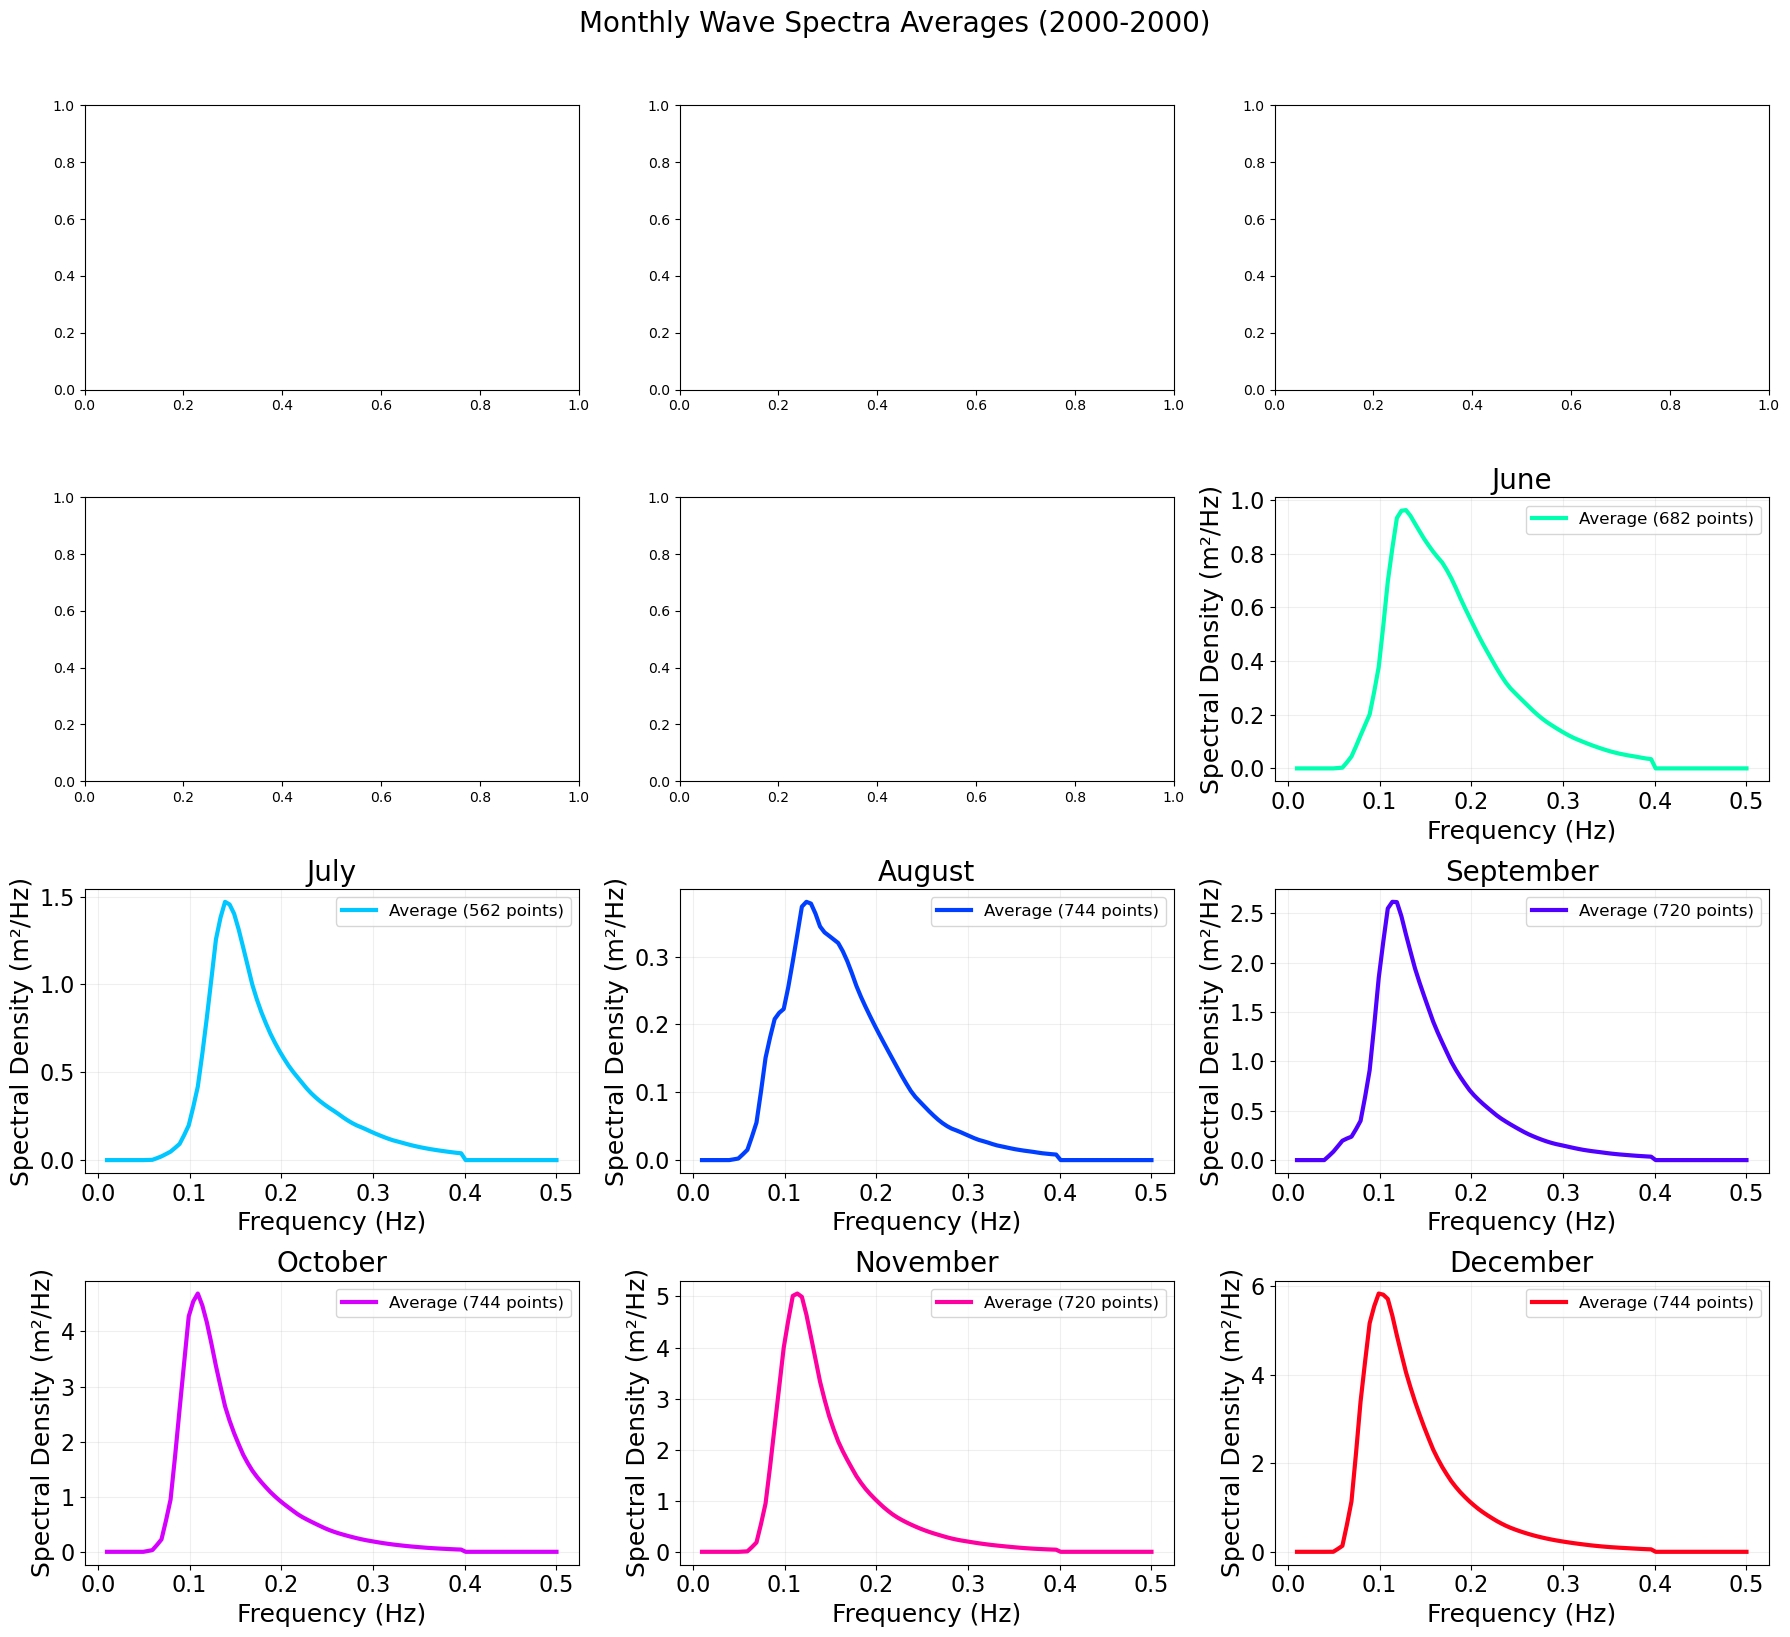

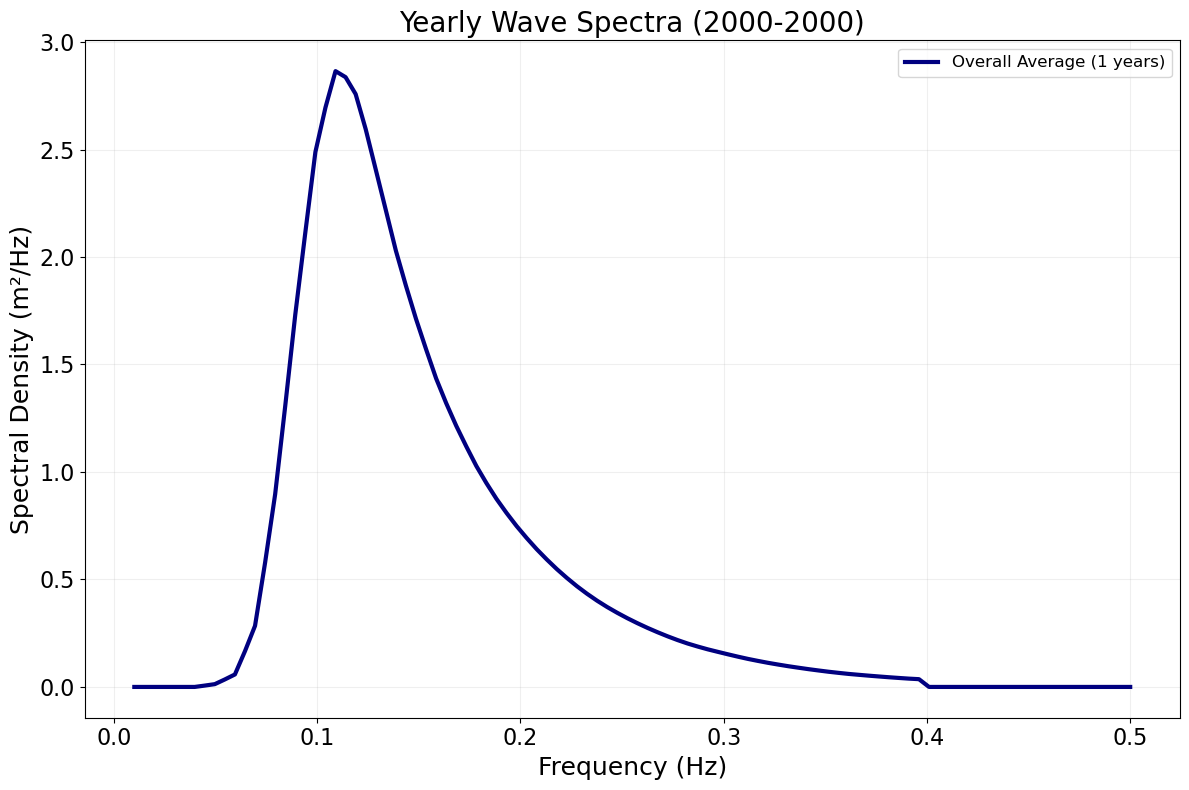

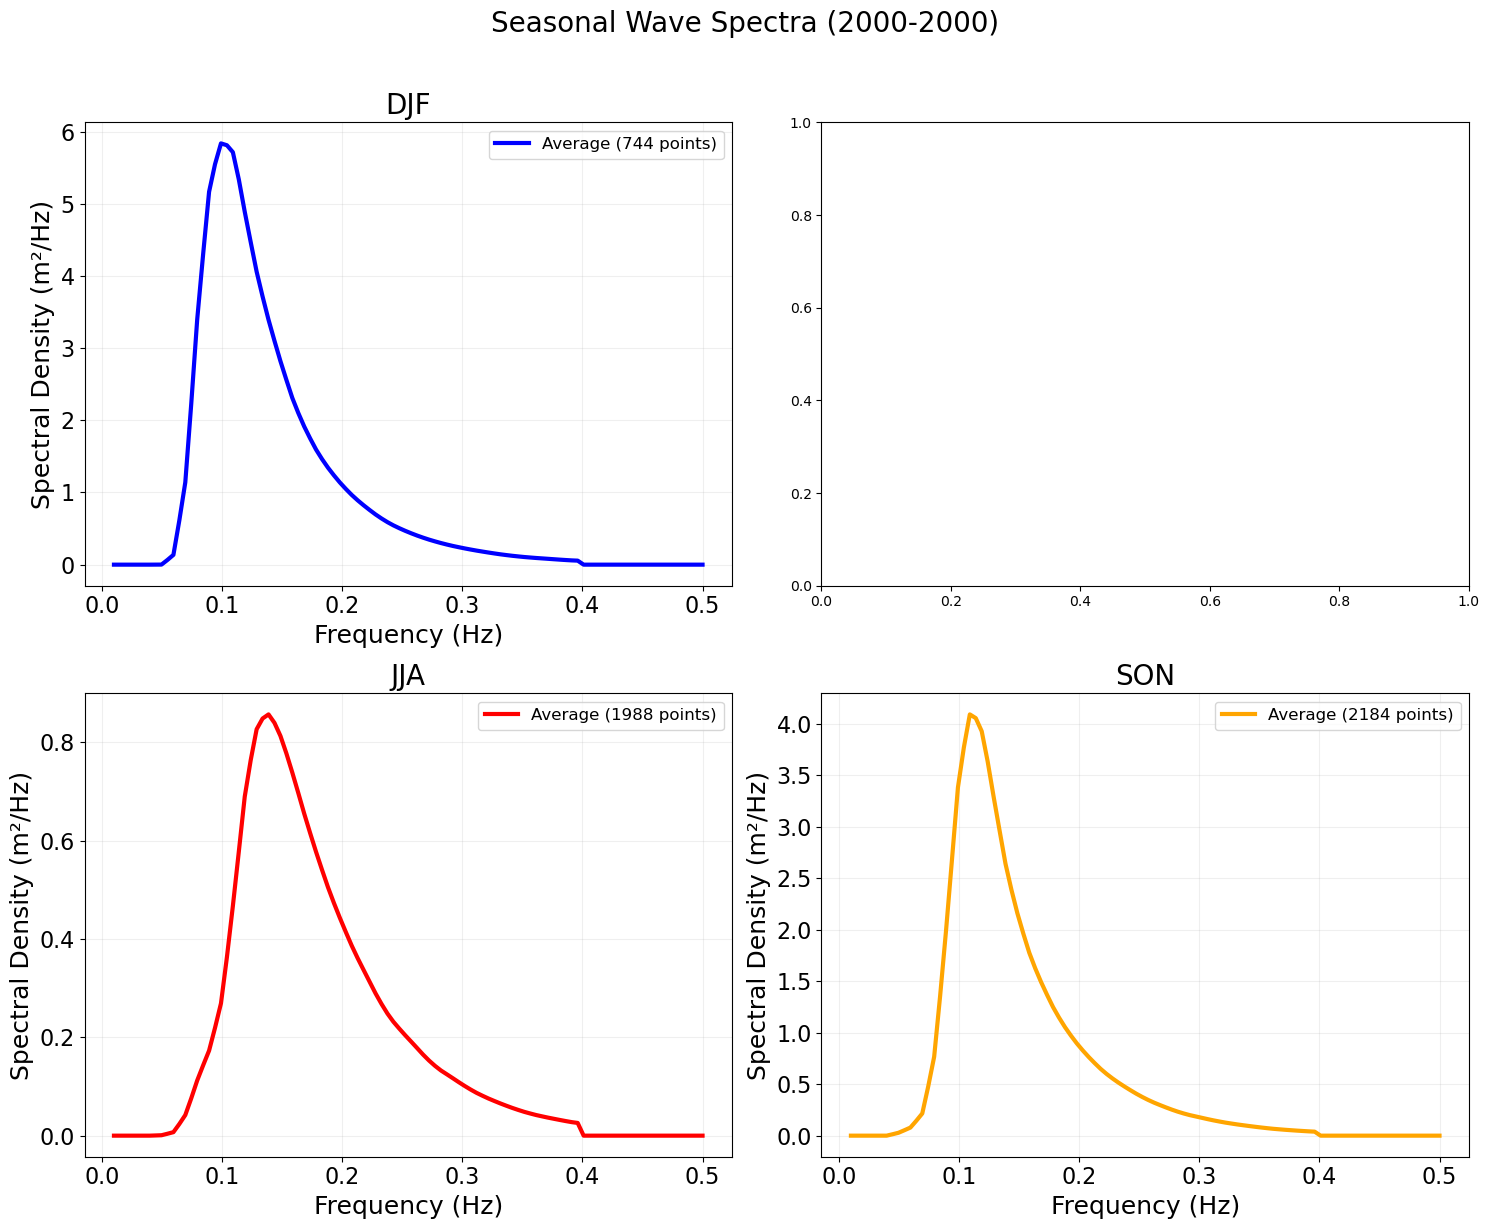

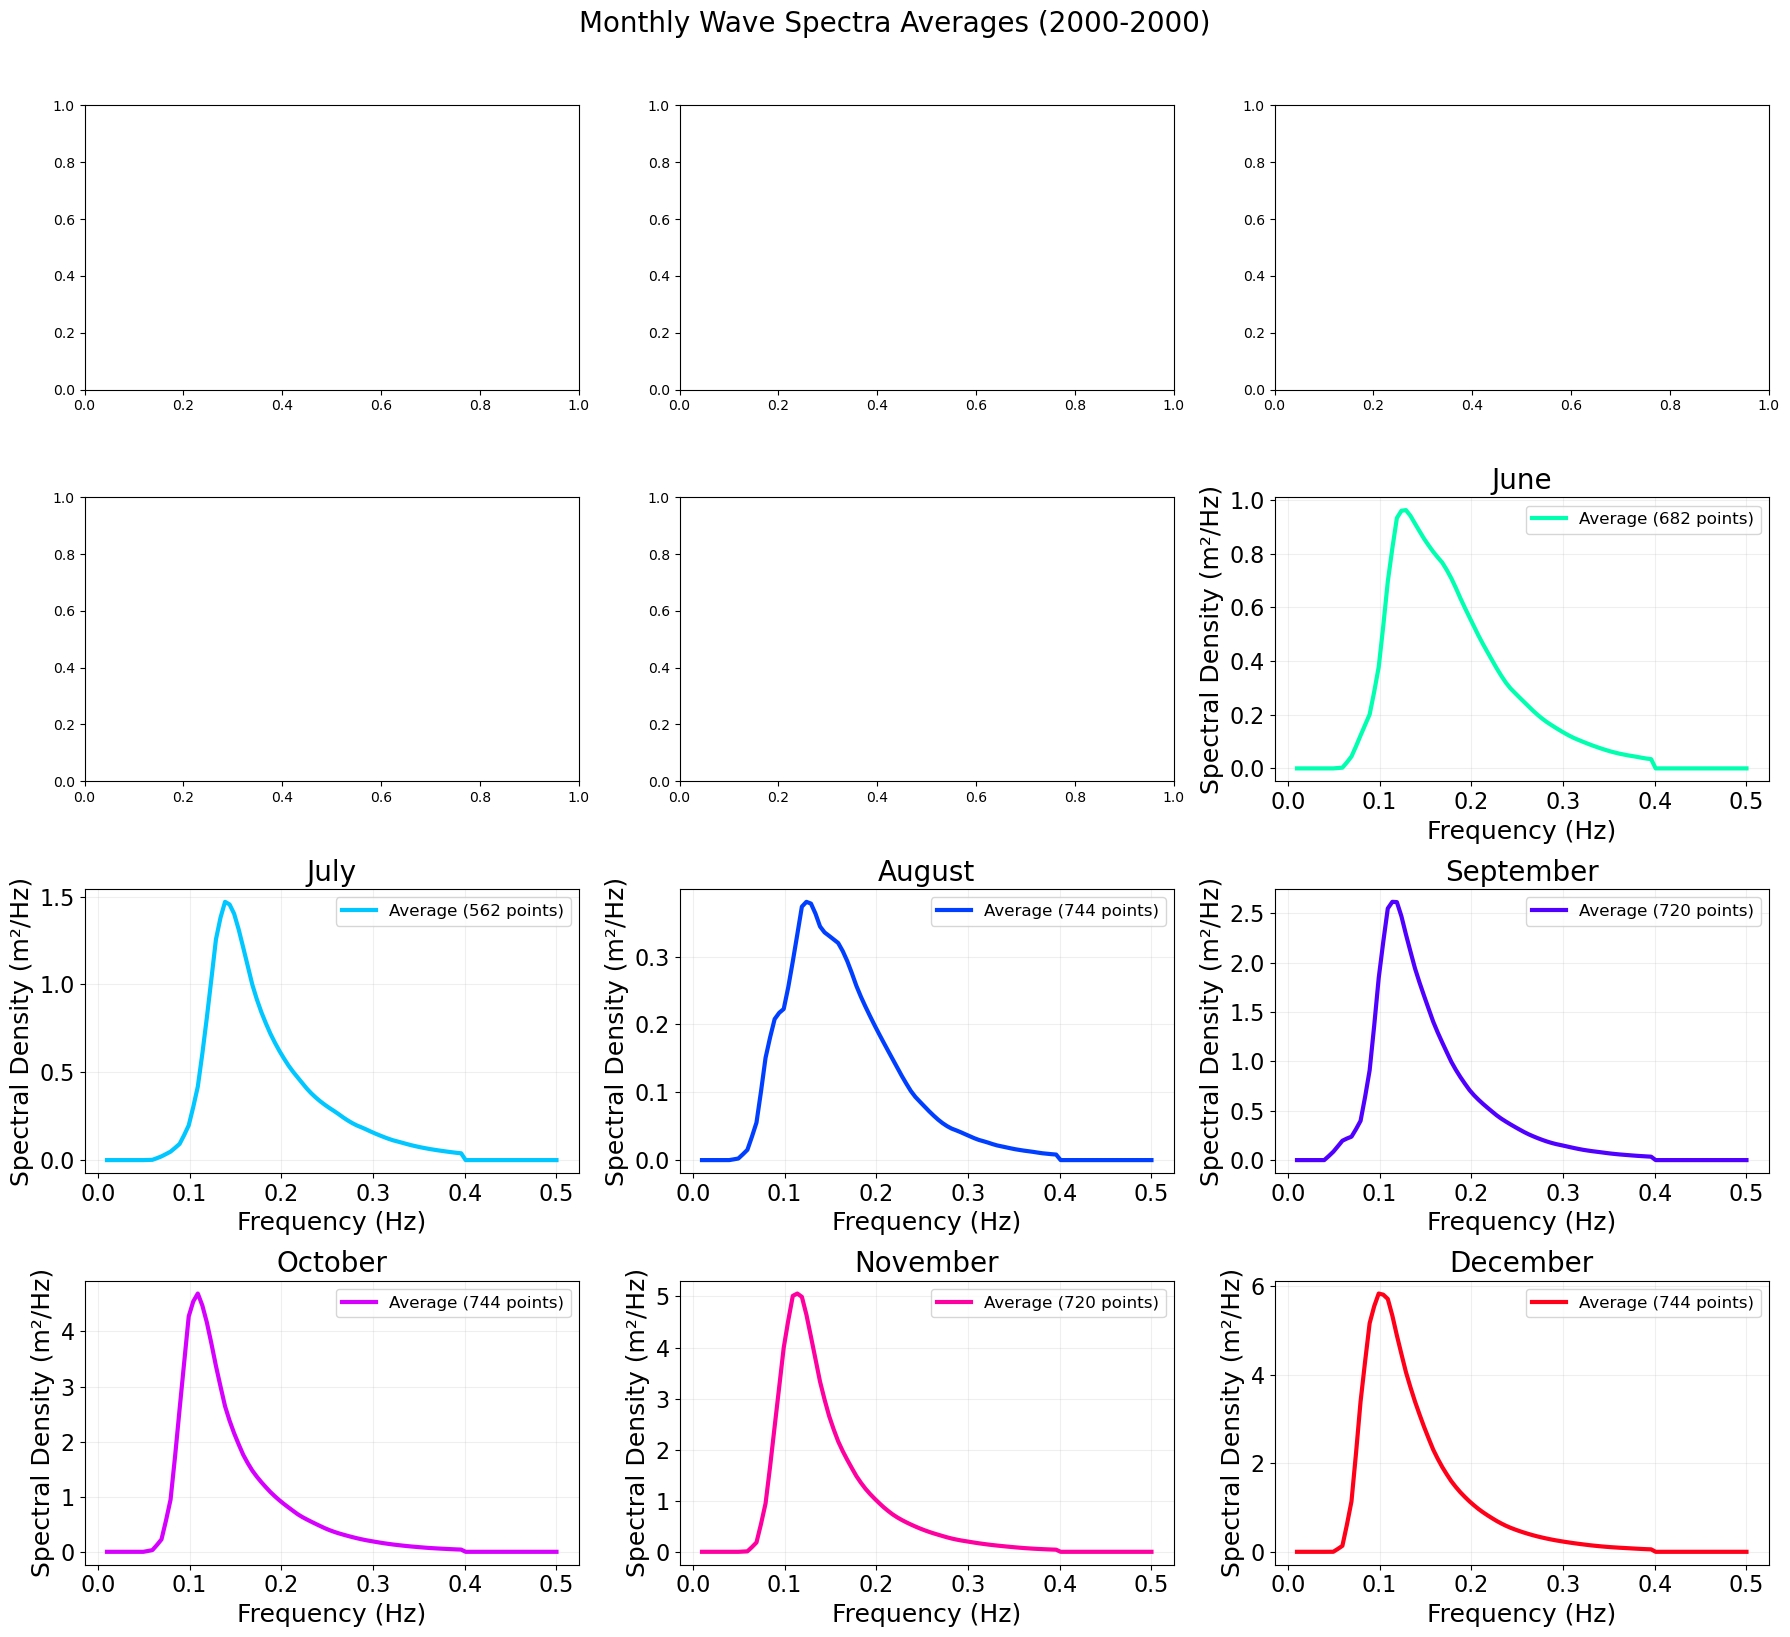

In [3]:
# Downloading and plotting Buoy Wave Energy Spectra
# Outputs:
# Generates a folder  (buoy_id/ wave_spectra) with files containing the wave energy spectra for each year.
# monthly_spectra_buoy_id_start_year_end_year.png: Monthly averaged wave spectra for the specified time range. The figure shows(Light lines: Monthly averages for each individual year,Dark line: Overall average for each month across all years)
# seasonal_spectra_buoy_id_start_year_end_year.png: Seasonal averaged spectra.  The figure shows(Light lines: Seasonal averages for each individual year,Dark line: Overall average for each season across all years)
# Average_spectra_buoy_id_start_year_end_year.png: averaged spectra for the specified time range, with the yearly average and total average.

from utils.ndbc_plotting import plot_yearly_averages
from utils.ndbc_plotting import plot_seasonal_averages
from utils.ndbc_plotting import plot_monthly_averages


spec_df = noaa_downloader.download_data(
    data_type="wave_spectra",
    load_df=True,
    buoy_id="41001",
    years=[2000],
)
plot_yearly_averages(spec_df)
plot_seasonal_averages(spec_df)
plot_monthly_averages(spec_df)

In [5]:
# Downloading Directional Wave Spectra files
# Outputs:
# Creates a folder buoy_id/directional_spectra containing the downloaded file per coefficient (alpha1, alpha2, r1, r2, c11) per year, required for spectral reconstruction.


direc_df = noaa_downloader.download_data(
    data_type="directional_spectra",
    load_df=True,
    buoy_id="41013",
    years=[2014, 2015, 2016, 2017, 2018],
)
direc_df

(                     0.0200  0.0325  0.0375  0.0425  0.0475  0.0525  0.0575  \
 2014-01-01 00:00:00   217.0   242.0    79.0    67.0    65.0    68.0    63.0   
 2014-01-01 01:00:00   214.0    47.0     2.0    44.0   252.0   266.0   297.0   
 2014-01-01 02:00:00   223.0   222.0   234.0    42.0    52.0    34.0    53.0   
 2014-01-01 03:00:00   220.0   227.0    49.0   220.0   209.0    67.0    50.0   
 2014-01-01 04:00:00   240.0   240.0    66.0    78.0    73.0    57.0    36.0   
 ...                     ...     ...     ...     ...     ...     ...     ...   
 2018-12-31 19:40:00    89.0   270.0    88.0    81.0    69.0    81.0    99.0   
 2018-12-31 20:40:00   131.0    26.0   201.0    24.0    50.0   339.0   113.0   
 2018-12-31 21:40:00   322.0   298.0   126.0   155.0    33.0   219.0   104.0   
 2018-12-31 22:40:00   358.0   302.0   105.0   214.0    81.0   160.0   164.0   
 2018-12-31 23:40:00   147.0   157.0   359.0   283.0   303.0    84.0    24.0   
 
                      0.0625  0.0675  

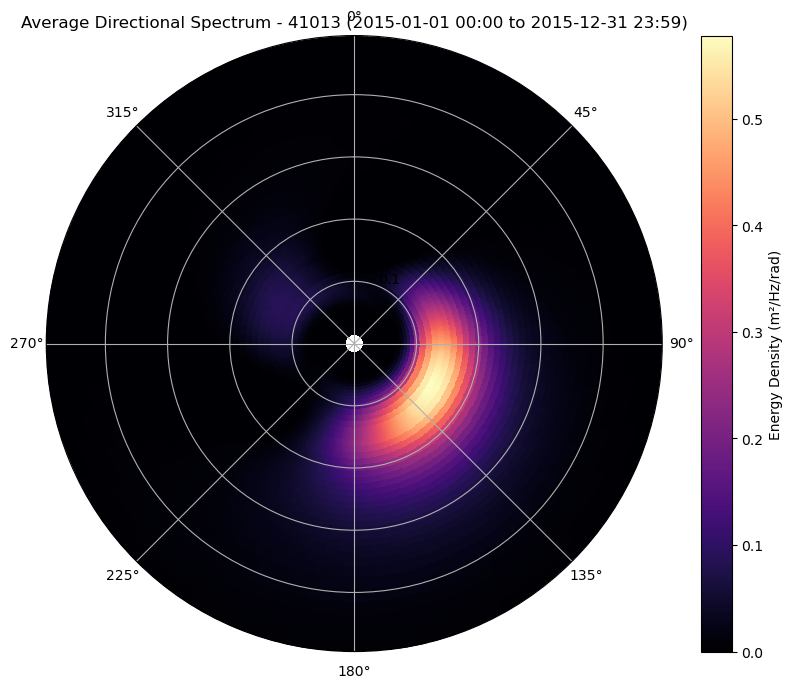

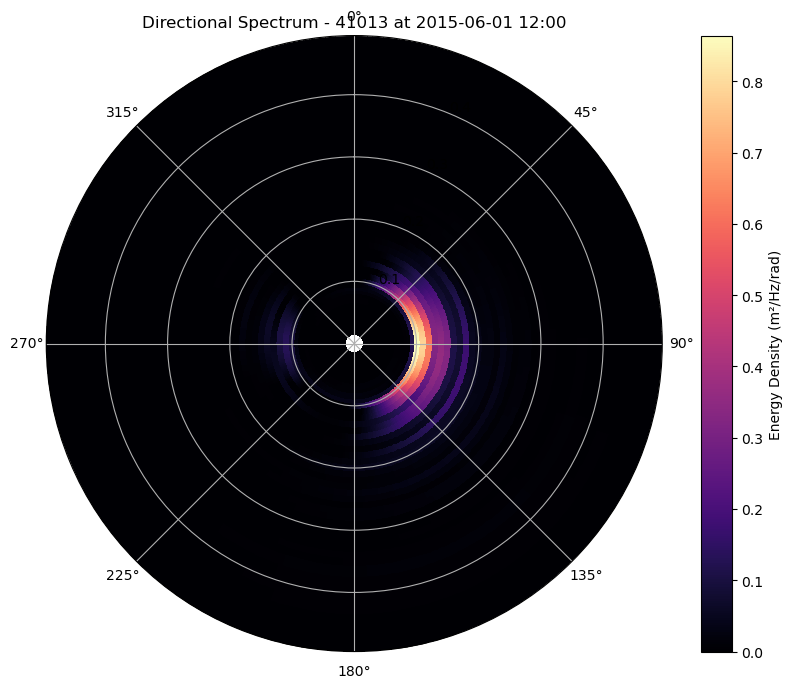

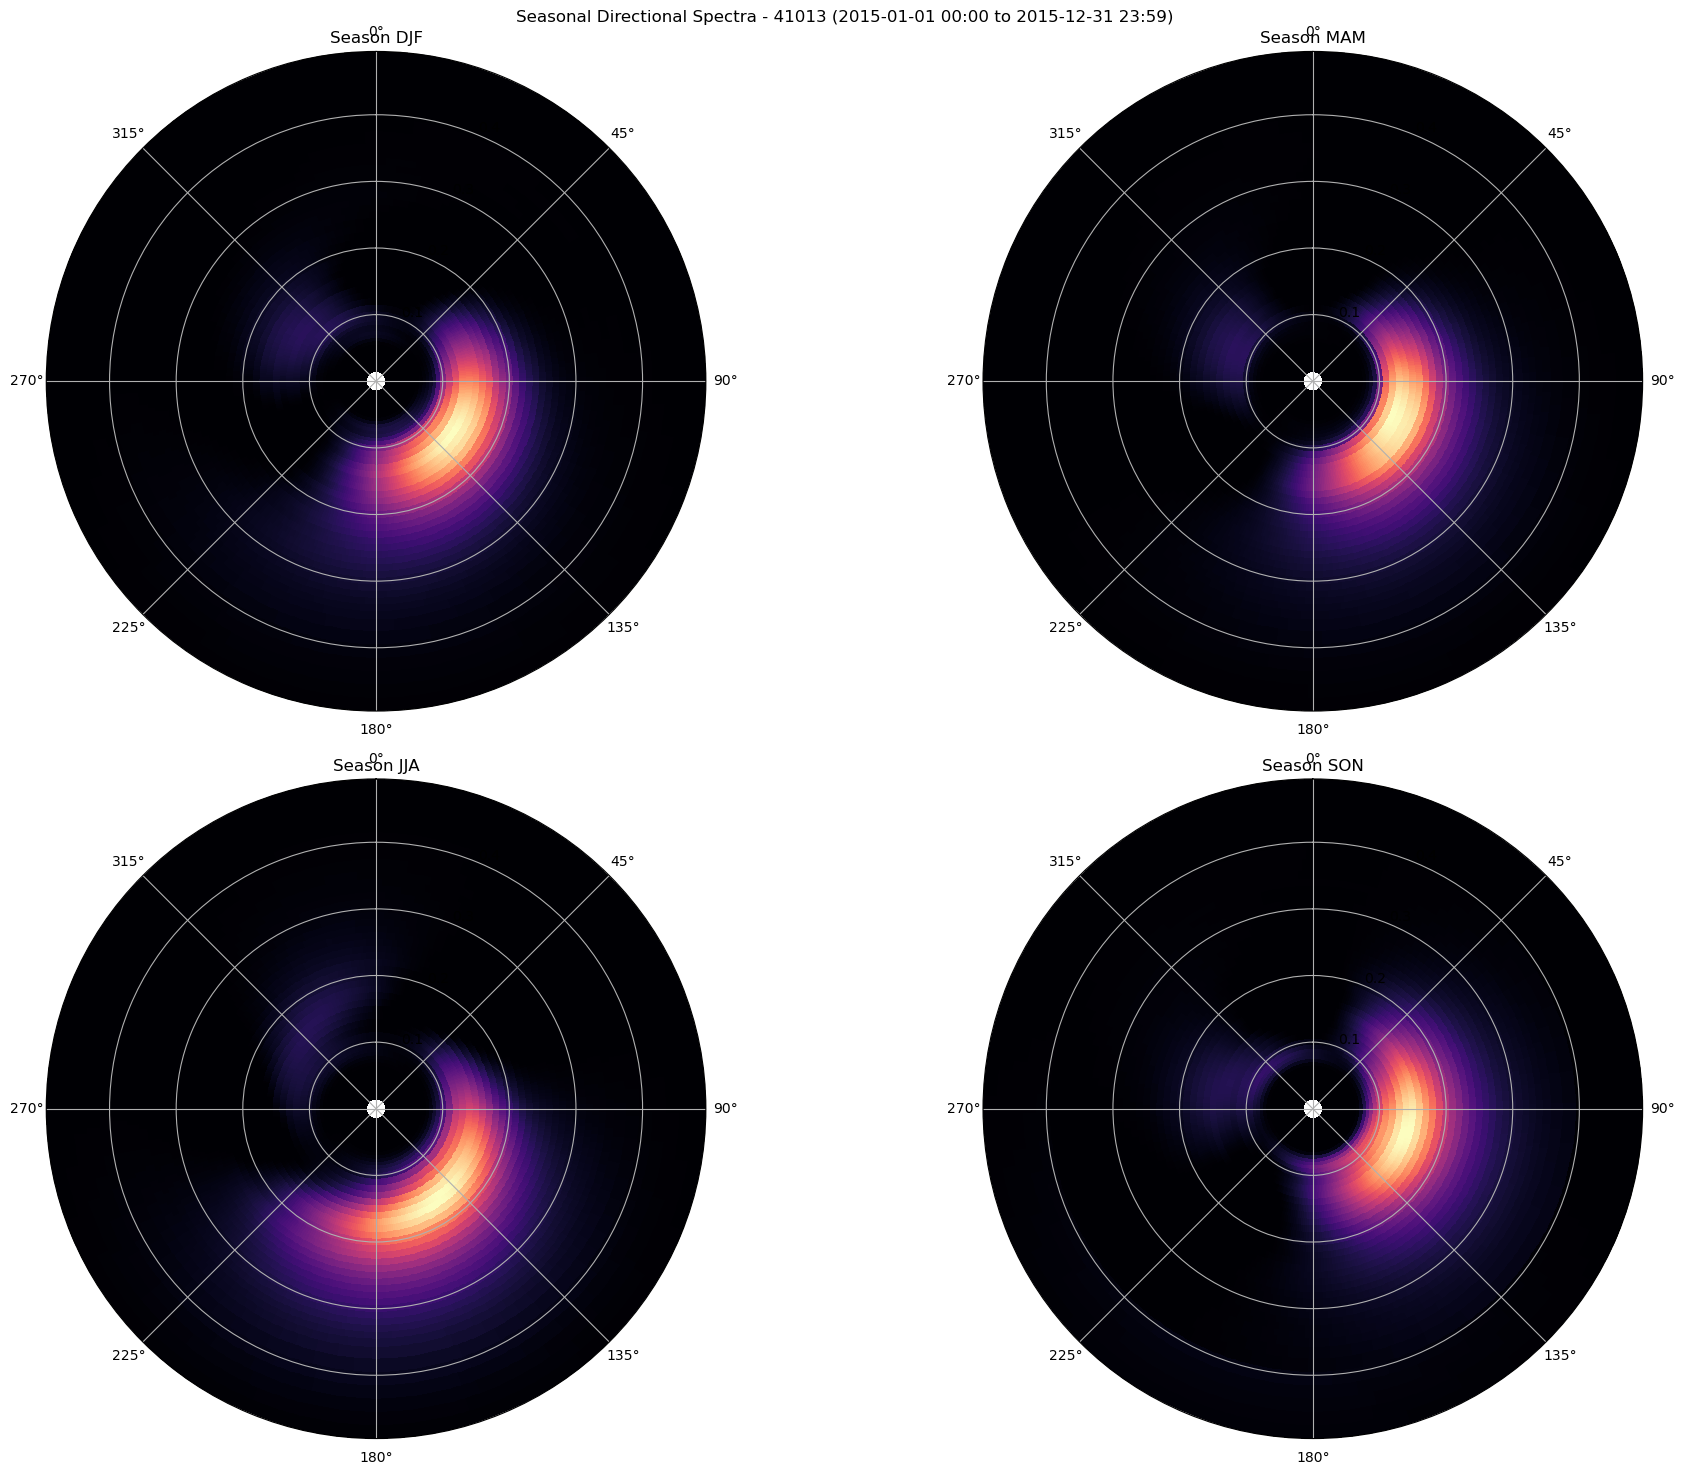

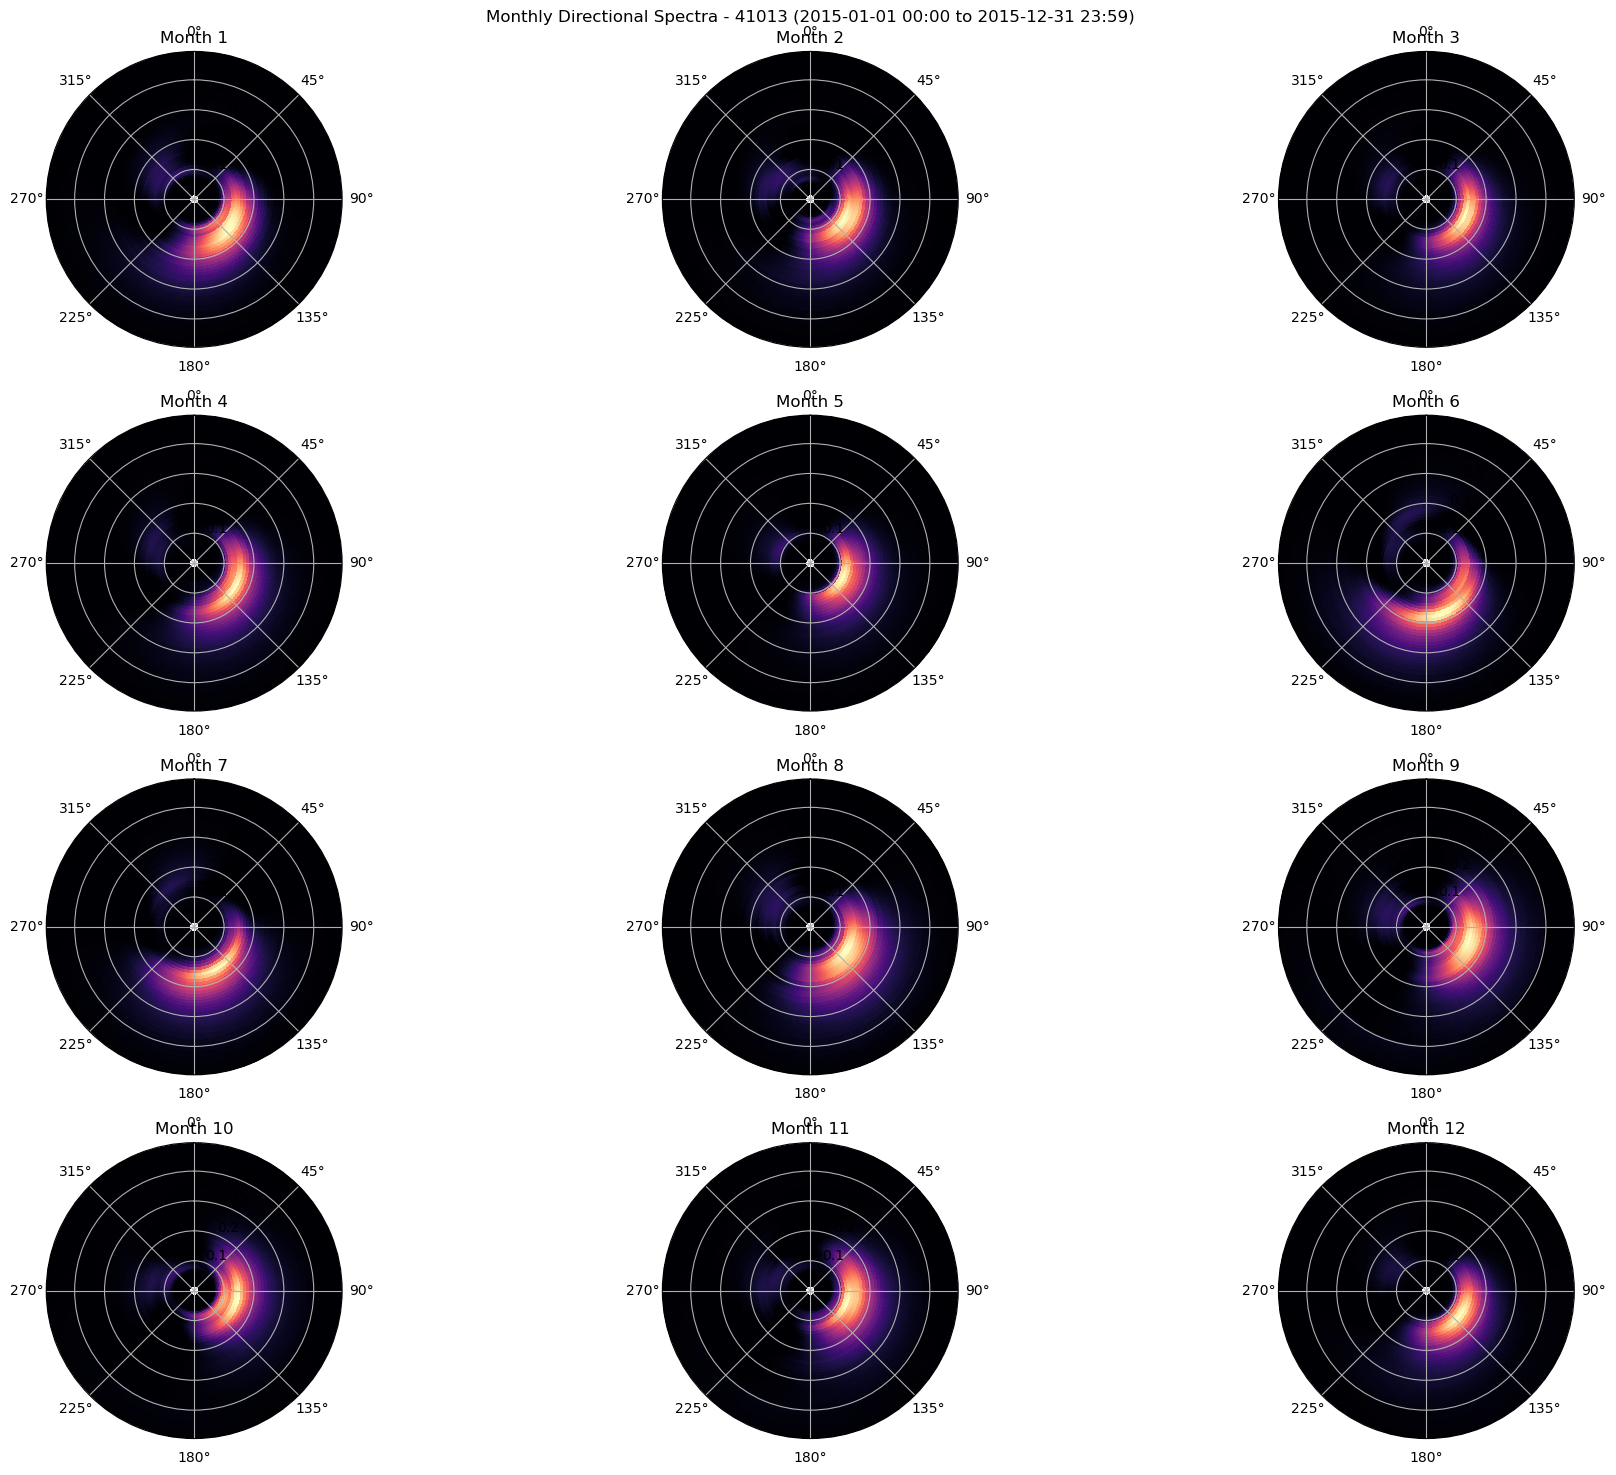

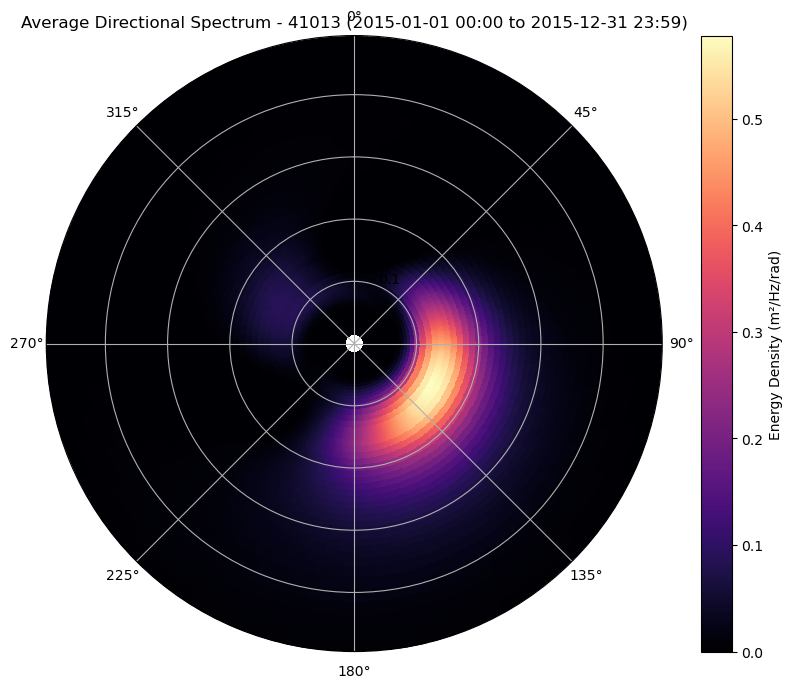

In [6]:
# Figures are saved in buoy_id/Figures:
# seasonal_directional_spectra_start_dt_end_dt.png: Seasonal directional spectra averagefor the specified time range.
# monthly_directional_spectra_start_dt_end_dt.png: Monthly directional spectra average for the specified time range.
# average_directional_spectrum_start_dt_end_dt.png: Average directional spectrum for the specified time range.

from utils.ndbc_plotting import (
    plot_specific_date_directional_spectrum,
    plot_average_directional_spectrum,
    plot_seasonal_directional_spectra,
    plot_monthly_directional_spectra,
)


# Example usage
buoy_id = "41013"
date_str = "2015-06-01 12:00"  # For specific date plot
start_date = "2015-01-01 00:00"  # For seasonal/monthly/average plots
end_date = "2015-12-31 23:59"  # For seasonal/monthly/average plots

# For specific date plot
alpha1, alpha2, r1, r2, c11 = (
    direc_df_elem.loc[date_str].values for direc_df_elem in direc_df
)
freqs = direc_df[0].columns.values
# Plot specific date
plot_specific_date_directional_spectrum(
    alpha1, alpha2, r1, r2, c11, freqs, buoy_id, date_str
)

# For seasonal/monthly/annual plots
alpha1_df, alpha2_df, r1_df, r2_df, c11_df = (
    direc_df_elem.loc[start_date:end_date] for direc_df_elem in direc_df
)
# Plot seasonal, monthly, and annual data
plot_seasonal_directional_spectra(
    alpha1_df,
    alpha2_df,
    r1_df,
    r2_df,
    c11_df,
    buoy_id,
    start_date,
    end_date,
)
plot_monthly_directional_spectra(
    alpha1_df,
    alpha2_df,
    r1_df,
    r2_df,
    c11_df,
    buoy_id,
    start_date,
    end_date,
)
plot_average_directional_spectrum(
    alpha1_df,
    alpha2_df,
    r1_df,
    r2_df,
    c11_df,
    buoy_id,
    start_date,
    end_date,
)